In [8]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,log_loss


In [9]:
df=pd.read_csv("Obesity Classification.csv")
df

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...,...
103,106,11,Male,175,10,3.9,Underweight
104,107,16,Female,160,10,3.9,Underweight
105,108,21,Male,180,15,5.6,Underweight
106,109,26,Female,150,15,5.6,Underweight


In [10]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]):
    df[i]=label.fit_transform(df[i])
df

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,1,175,80,25.3,0
1,2,30,0,160,60,22.5,0
2,3,35,1,180,90,27.3,2
3,4,40,0,150,50,20.0,3
4,5,45,1,190,100,31.2,1
...,...,...,...,...,...,...,...
103,106,11,1,175,10,3.9,3
104,107,16,0,160,10,3.9,3
105,108,21,1,180,15,5.6,3
106,109,26,0,150,15,5.6,3


In [11]:
x=df.drop(columns="Label")
y=df["Label"]
y

0      0
1      0
2      2
3      3
4      1
      ..
103    3
104    3
105    3
106    3
107    3
Name: Label, Length: 108, dtype: int64

In [12]:
stand=StandardScaler()
X=stand.fit_transform(x)
X

array([[-1.73265960e+00, -8.76031772e-01,  9.63624112e-01,
         3.03699681e-01,  7.14052814e-01,  6.29376229e-01],
       [-1.70118319e+00, -6.72828526e-01, -1.03774904e+00,
        -2.36952498e-01,  1.77304310e-02,  2.58447810e-01],
       [-1.66970678e+00, -4.69625280e-01,  9.63624112e-01,
         4.83917074e-01,  1.06221401e+00,  8.94325099e-01],
       [-1.63823038e+00, -2.66422034e-01, -1.03774904e+00,
        -5.97387285e-01, -3.30430760e-01, -7.27382778e-02],
       [-1.60675397e+00, -6.32187876e-02,  9.63624112e-01,
         8.44351861e-01,  1.41037520e+00,  1.41097540e+00],
       [-1.57527757e+00,  1.39984458e-01, -1.03774904e+00,
        -9.57822071e-01, -6.78591952e-01, -5.09903914e-01],
       [-1.54380116e+00,  3.43187704e-01,  9.63624112e-01,
         1.20478665e+00,  1.75853639e+00,  1.80839870e+00],
       [-1.51232475e+00,  5.46390950e-01, -1.03774904e+00,
        -1.31825686e+00, -1.02675314e+00, -9.60316993e-01],
       [-1.48084835e+00,  7.49594196e-01,  9.636

In [13]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [15]:
model=Sequential()
model.add(Dense(320,activation="relu"))
model.add(Dense(160,activation="relu"))
model.add(Dense(80,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(1,activation="sigmoid"))




In [16]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [17]:
early=EarlyStopping(monitor="val_loss",patience=5,restore_best_weights=True)

In [18]:
history=model.fit(
    x_train,y_train,
    verbose=1,
    epochs=20,
    batch_size=256,
    validation_split=0.2,
    callbacks=[early]
    )



Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1912 - loss: 1.0911 - val_accuracy: 0.2778 - val_loss: 0.7811
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.1765 - loss: 0.8495 - val_accuracy: 0.1111 - val_loss: 0.6951
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.1176 - loss: 0.6802 - val_accuracy: 0.1111 - val_loss: 0.6345
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.1176 - loss: 0.5735 - val_accuracy: 0.1111 - val_loss: 0.5584
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.1176 - loss: 0.4709 - val_accuracy: 0.1111 - val_loss: 0.4721
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.1176 - loss: 0.3546 - val_accuracy: 0.1111 - val_loss: 0.3781
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.1176 - loss: 0.2218 - val_accuracy: 0.1111 - val_loss: 0.2731
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.1176 - loss: 0.0728 - val_accuracy: 0.1111 - val_loss: 0.1588

In [ ]:
loss,accuracy=model.evaluate(x_test,y_test)
print("loss:",loss)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.0909 - loss: -0.6982
loss: -0.698239803314209


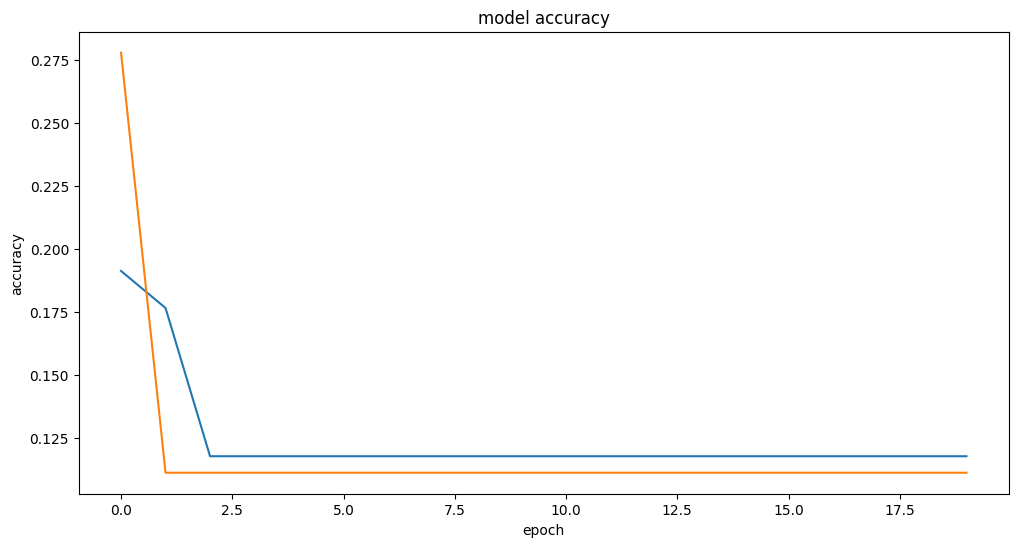

In [20]:
plt.figure(figsize=(12,6))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy") 
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.show()

In [22]:
new=np.array([[0,1,1,1,1,1]])
new=stand.transform(new)
pred=model.predict(new)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
[[0.99999833]]


c:\Users\AKASH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
